# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
heber = pd.read_csv('Heber Valley Hospital.csv')
heber.shape

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(199820, 15)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [2]:
heber.columns

Index(['CDM', 'Bill Item', 'Service Code', 'Service Description', 'Payer',
       'Contract', 'Inpatient Cash Price', 'Inpatient Min Price',
       'Inpatient Max Price', 'Inpatient Negotiated Price',
       'Outpatient Cash Price', 'Outpatient Min Price', 'Outpatient Max Price',
       'Outpatient Negotiated Price', 'Charge Price'],
      dtype='object')

In [3]:
heber.head()

,CDM,Bill Item,Service Code,Service Description,Payer,Contract,Inpatient Cash Price,Inpatient Min Price,Inpatient Max Price,Inpatient Negotiated Price,Outpatient Cash Price,Outpatient Min Price,Outpatient Max Price,Outpatient Negotiated Price,Charge Price
0,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,Deseret Mutual,DMBA Deseret Value,$0.00,"$142,677.00","$415,862.00","$215,294.00",$0.00,$0.00,$0.00,$0.00,$0.00
1,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,Aetna,Aetna Utah Connected Network,$0.00,"$142,677.00","$415,862.00","$415,862.00",$0.00,$0.00,$0.00,$0.00,$0.00
2,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,SelectHealth,SelectHealth Med Network Federal Employee (FEHBP),$0.00,"$142,677.00","$415,862.00","$162,129.00",$0.00,$0.00,$0.00,$0.00,$0.00
3,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,SelectHealth,SelectHealth Value Network,$0.00,"$142,677.00","$415,862.00","$142,677.00",$0.00,$0.00,$0.00,$0.00,$0.00
4,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,SelectHealth,SelectHealth Share Network,$0.00,"$142,677.00","$415,862.00","$142,677.00",$0.00,$0.00,$0.00,$0.00,$0.00


In [4]:
unique_columns = {} 
for col in heber.columns:
    count = len(heber[col].unique())
    unique_columns[col] = count       
unique_columns

{'CDM': 1450,
 'Bill Item': 1757,
 'Service Code': 1592,
 'Service Description': 2575,
 'Payer': 51,
 'Contract': 85,
 'Inpatient Cash Price': 2108,
 'Inpatient Min Price': 2042,
 'Inpatient Max Price': 2051,
 'Inpatient Negotiated Price': 14308,
 'Outpatient Cash Price': 1987,
 'Outpatient Min Price': 1274,
 'Outpatient Max Price': 1411,
 'Outpatient Negotiated Price': 8692,
 'Charge Price': 2138}

In [5]:
most_diverse = [0, 0]
for col, count in unique_columns.items():
        if count > most_diverse[1]:
            most_diverse = [col, count]
            
most_diverse

['Inpatient Negotiated Price', 14308]

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [6]:
singular_value = []
for col, count in unique_columns.items():
        if count == 1:
            singular_value.append = [col, count]
print(singular_value)

if len(singular_value) == 0:
    print('There are no columns in this dataset that have only one value')

[]
There are no columns in this dataset that have only one value


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [7]:
heber['Inpatient Cash Price'] = heber['Inpatient Cash Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Inpatient Min Price'] = heber['Inpatient Min Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Inpatient Max Price'] = heber['Inpatient Max Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Inpatient Negotiated Price'] = heber['Inpatient Negotiated Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Outpatient Cash Price'] = heber['Outpatient Cash Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Outpatient Min Price'] = heber['Outpatient Min Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Outpatient Max Price'] = heber['Outpatient Max Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Outpatient Negotiated Price'] = heber['Outpatient Negotiated Price'].replace('[\$\,]', '', regex=True).astype(float)
heber['Charge Price'] = heber['Charge Price'].replace('[\$\,]', '', regex=True).astype(float)

In [8]:
heber.head()

,CDM,Bill Item,Service Code,Service Description,Payer,Contract,Inpatient Cash Price,Inpatient Min Price,Inpatient Max Price,Inpatient Negotiated Price,Outpatient Cash Price,Outpatient Min Price,Outpatient Max Price,Outpatient Negotiated Price,Charge Price
0,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,Deseret Mutual,DMBA Deseret Value,0.0,142677.0,415862.0,215294.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,Aetna,Aetna Utah Connected Network,0.0,142677.0,415862.0,415862.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,SelectHealth,SelectHealth Med Network Federal Employee (FEHBP),0.0,142677.0,415862.0,162129.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,SelectHealth,SelectHealth Value Network,0.0,142677.0,415862.0,142677.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,SelectHealth,SelectHealth Share Network,0.0,142677.0,415862.0,142677.0,0.0,0.0,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d88859b0>,
      dtype=object)

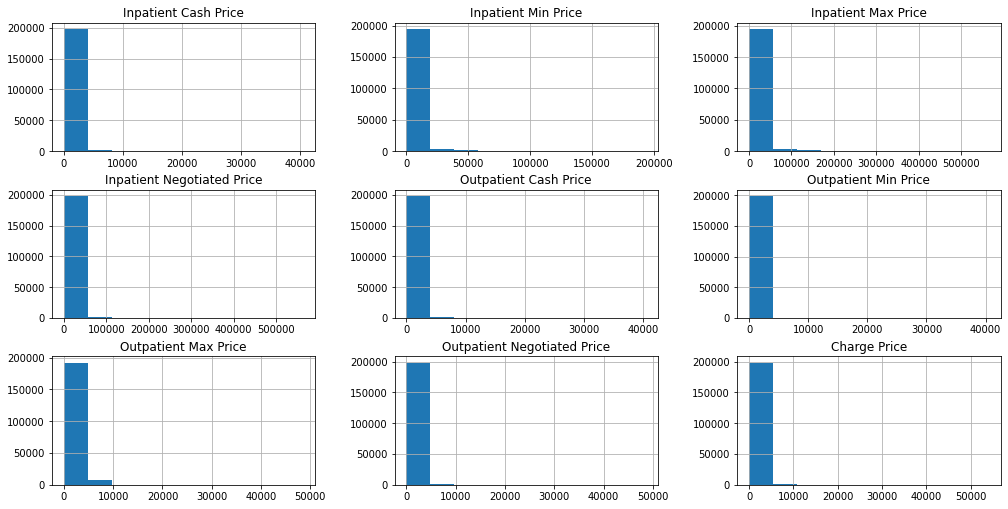

In [9]:
heber[['Inpatient Cash Price', 'Inpatient Min Price',
       'Inpatient Max Price', 'Inpatient Negotiated Price',
       'Outpatient Cash Price', 'Outpatient Min Price', 'Outpatient Max Price',
       'Outpatient Negotiated Price', 'Charge Price']].hist(
    bins=10, 
    figsize = (17,8.5), 
    )

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [10]:
# heber['Negotiated Price'] = heber['Inpatient Negotiated Price'] + heber['Outpatient Negotiated Price']

heber_no_dup = heber.drop_duplicates(subset=['CDM', 'Bill Item', 'Service Description', 'Payer'
], keep='last')
summary = pd.pivot_table(heber_no_dup,
    values='Inpatient Negotiated Price',
    columns='Payer',
    index='Service Description',
    aggfunc='sum',
    fill_value = 0
)
#summary.replace('[\$\,\.]', '', regex=True).astype(int)
summary

Payer,1-800 Contacts,Aetna,Altius,BCBS OOS - PPO,BCBS OOS -TRAD,BYU Athletic Department,BYU Risk Management,Big-D Construction,Campbell Scientific,Cigna Healthcare,...,SpringTide,Tanner LLC,TriWest,Union Pacific Railroad Employes Health,United Healthcare,United States Ski & Snowboard Association,University of Utah,Utah Cancer Control Program (UCCP),WCF Insurance,Wise
Service Description,,,,,,,,,,,,,,,,,,,,,
/ IV HYDRATION-31 MIN TO 1 HOUR-INITIAL,349.90,349.90,341.85,341.85,350.97,341.85,350.97,349.90,359.22,341.85,...,341.85,359.22,0,371.61,349.90,371.61,341.85,0,309.68,349.90
/ IV INFUSION-SEQUENTAL NEW DRUG-UP TO 1 HOUR,284.95,301.49,294.56,294.56,294.56,294.56,294.56,301.49,301.49,294.56,...,294.56,284.95,0,311.89,284.95,311.89,278.40,0,259.91,284.95
/ IV INFUSION-UP TO 1 HOUR- INITIAL,367.24,367.24,358.79,358.79,358.79,358.79,358.79,367.24,367.24,358.79,...,358.79,367.24,0,379.90,367.24,379.90,358.79,0,316.58,352.15
/ IV PUSH-SEQUENTIAL NEW DRUG,104.50,105.05,102.10,102.64,102.64,102.64,102.10,105.05,104.50,102.64,...,102.64,104.50,0,108.11,105.05,108.11,102.64,0,90.56,105.05
/ IV PUSH-SINGLE/INITIAL DRUG,170.99,170.99,167.06,167.06,167.06,167.06,167.06,170.99,170.99,167.06,...,167.06,170.99,0,176.89,170.99,176.89,167.06,0,147.41,170.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vedolizumab 300 mg vial / vedolizumab 300 mg vial [HIGH COST] / vedolizumab 60 mg/mL 5 mL vial,16419.99,16419.99,16042.52,16042.52,16042.52,16042.52,16042.52,16419.99,16419.99,16042.52,...,16042.52,16419.99,0,16986.20,16419.99,16986.20,16042.52,0,14155.16,16419.99
verapamil SR 120 mg 12 hr tablet,5.05,5.05,4.94,4.94,4.94,4.94,4.94,5.05,5.05,4.94,...,4.94,5.05,0,5.23,5.05,5.23,4.94,0,4.36,5.05
zoledronic acid 4 mg/5 mL vial,205.60,205.60,200.87,200.87,200.87,200.87,200.87,205.60,205.60,200.87,...,200.87,205.60,0,212.69,205.60,212.69,200.87,0,177.24,205.60


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 8 Text major ticklabel objects>)

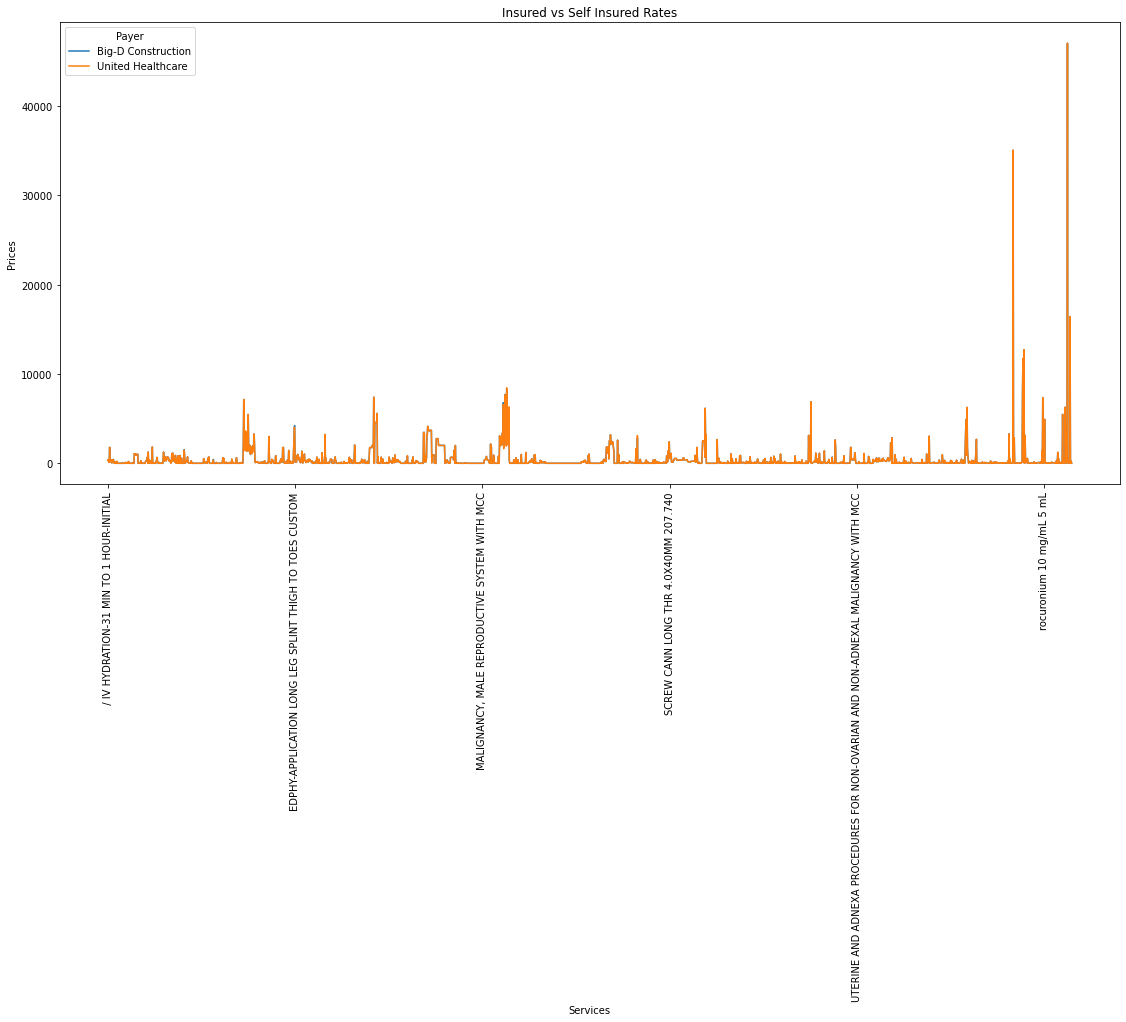

In [11]:
# groups = heber.groupby(['Service Description'])
summary.plot(y = ['Big-D Construction','United Healthcare'], figsize = (19, 8.5), title = 'Insured vs Self Insured Rates', xlabel = 'Services', ylabel = 'Prices')

# plt.setp(summary.get_xticklabels(), rotation = 45)
#plt.figure(figsize=(17,11)) 
# plt.ylabel('Negotiated Price')
# plt.title('Price Comparison Insurance to Self Insured')
plt.xticks(rotation = 'vertical')
# plt.show() 

# plt.style.use('seaborn')

# for service in heber['Service Description'].unique():
#     fig, ax = plt.subplots()
#     sub = heber[heber.Service_Description == service]
#     sns.barplot(y='Negotiated Price',x='Payer', data = sub, orient='h', ax=ax)
#     ax.set_title(service.capitalize())
#  for i, (service, prices) in enumerate(groups):
#      prices.plot.bar(x='Payer',y='Negotiated Price')
#      ax.set_title(service)
#     ax.set_xlim(0,20000)
#     ax.set_ylim(0,80000)

# plt.tight_layout()
# plt.show()

A brief comparrison of rates for a single self insured organization to a single insurance company reflects very little differnce in negotiated prices

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [12]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

---

In [13]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push

Updating f9f191b..2d1118f
Fast-forward
 week09/feedback.md | 2 ++
 1 file changed, 2 insertions(+)
 create mode 100644 week09/feedback.md
[main eb6d03e] Submitting the week 12 assignment
 3 files changed, 1447 insertions(+), 13 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb


From github.com:joshtaylor1987/hds5210-2021
   f9f191b..2d1118f  main       -> origin/main
To github.com:joshtaylor1987/hds5210-2021.git
   2d1118f..eb6d03e  main -> main



---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.